# RNN으로 여행자 수 예측

In [373]:
# 패키지 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.layers import Dense, LSTM, InputLayer,SimpleRNN
from keras.models import Sequential
from sklearn.model_selection import train_test_split


In [374]:
# 파라미터
MY_PAST = 3             # 미래 예측을 위해 사용하는 과거 데이터 수, 입력 데이터 수
MY_SPLIT = 0.8          # 학습용 데이터 비율
MY_HIDDEN = 300         # RNN 셀 내부 복잡도 (다음 단으로 넘겨 주는 데이터 차원 수)
MY_SHAPE = (MY_PAST,1)  # RNN 입력 데이터 모양
MY_EPOCH = 300          # 반복 학습 수

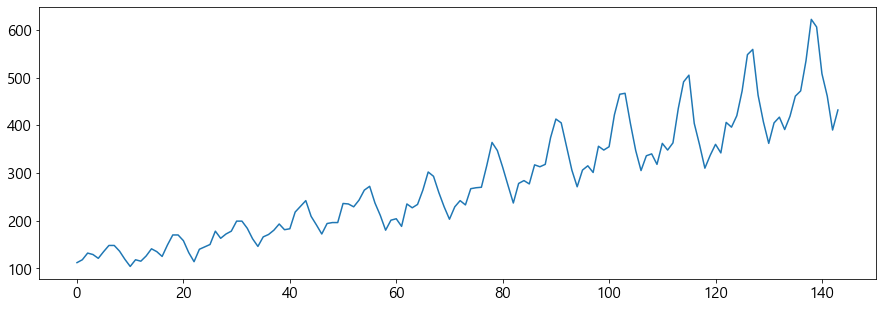

In [375]:
# 데이터 읽기
data = pd.read_csv('airline.csv',header=None,usecols=[1])

# 샘플 출력
# display(data.head(5))
# print(data.describe())

# 그래프 그리기
plt.figure(figsize=(15,5))
plt.plot(data)
plt.show()

In [376]:
# 데이터 정규화 : MinMaxScaler
scaler = MinMaxScaler()
m_data = scaler.fit_transform(data)
# print('정규화 전',data.to_numpy().flatten())
# print('정규화 후',m_data.flatten())

# numpy를 pandas로 재전환 (정규화 하면 numpy가 됨)
# m_data = pd.DataFrame(m_data)
# print(m_data.describe())
# plt.figure(figsize=(15,5))
# plt.plot(m_data)

In [377]:
# 데이터 분할
split = []
size = len(m_data)
print('데이터 수:', size)

for i in range(size - MY_PAST):
    split.append(m_data[i:i + MY_PAST + 1])

print(m_data.flatten())
print(split[0])
print(split[1])
print("총 4개짜리 묶음 {}개".format(len(split)))

데이터 수: 144
[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 0.33397683 0.41119691 0.4034749  0.4131

In [378]:
# 분할 데이터 추가 처리
print(type(split))
split = np.array(split)
print(type(split))
print('시계열 분할 데이터 모양 : ',split.shape)
print(split)

<class 'list'>
<class 'numpy.ndarray'>
시계열 분할 데이터 모양 :  (141, 4, 1)
[[[0.01544402]
  [0.02702703]
  [0.05405405]
  [0.04826255]]

 [[0.02702703]
  [0.05405405]
  [0.04826255]
  [0.03281853]]

 [[0.05405405]
  [0.04826255]
  [0.03281853]
  [0.05984556]]

 [[0.04826255]
  [0.03281853]
  [0.05984556]
  [0.08494208]]

 [[0.03281853]
  [0.05984556]
  [0.08494208]
  [0.08494208]]

 [[0.05984556]
  [0.08494208]
  [0.08494208]
  [0.06177606]]

 [[0.08494208]
  [0.08494208]
  [0.06177606]
  [0.02895753]]

 [[0.08494208]
  [0.06177606]
  [0.02895753]
  [0.        ]]

 [[0.06177606]
  [0.02895753]
  [0.        ]
  [0.02702703]]

 [[0.02895753]
  [0.        ]
  [0.02702703]
  [0.02123552]]

 [[0.        ]
  [0.02702703]
  [0.02123552]
  [0.04247104]]

 [[0.02702703]
  [0.02123552]
  [0.04247104]
  [0.07142857]]

 [[0.02123552]
  [0.04247104]
  [0.07142857]
  [0.05984556]]

 [[0.04247104]
  [0.07142857]
  [0.05984556]
  [0.04054054]]

 [[0.07142857]
  [0.05984556]
  [0.04054054]
  [0.08687259]]

 [

In [379]:
# 데이터 분리
X_data = split[:,0:MY_PAST]
# print(X_data)
print('입력 데이터 모양:', X_data.shape)

Y_data = split[:,-1]
print('출력 데이터 모양:',Y_data.shape)

print(X_data[0])
print(Y_data[0])

print('출력 데이터 모양: ',Y_data.shape)

입력 데이터 모양: (141, 3, 1)
출력 데이터 모양: (141, 1)
[[0.01544402]
 [0.02702703]
 [0.05405405]]
[0.04826255]
출력 데이터 모양:  (141, 1)


In [380]:
# 데이터를 학습용과 평가용으로 분할
# 시계열 데이터는 절대 shuffle True 하지 말 것
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,
                                                    train_size = MY_SPLIT,
                                                    shuffle=False,
                                                    random_state=22)
# 최종 데이터 모양 확인
print('X_train 모양 \t :',X_train.shape)
print('X_test 모양 \t :',X_test.shape)
print('Y_train 모양 \t :',Y_train.shape)
print('Y_test 모양 \t :',Y_test.shape)

X_train 모양 	 : (112, 3, 1)
X_test 모양 	 : (29, 3, 1)
Y_train 모양 	 : (112, 1)
Y_test 모양 	 : (29, 1)


In [381]:
# RNN 구현
model = Sequential()

# 입력층
model.add(InputLayer(input_shape=MY_SHAPE))

# RNN 셀 추가
model.add(SimpleRNN(units=MY_HIDDEN))

# 출력층
model.add(Dense(units=1,
                activation='sigmoid'))

# RNN 요약
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_22 (SimpleRNN)   (None, 300)               90600     
                                                                 
 dense_21 (Dense)            (None, 1)                 301       
                                                                 
Total params: 90,901
Trainable params: 90,901
Non-trainable params: 0
_________________________________________________________________


In [382]:
# RNN 학습 환경 설정
model.compile(optimizer='adam',
            loss='mae')  # mape(mean absolute precentage error) >> { ∑ (ㅣ정답 - 예측값ㅣ / 2 ) } / n
                            # mae가 절대적인 숫자로만 손실을 계산하는거라 mae값만 보고 손실 정도를 파악하기 힘들지만
                            # mape는 손실이 백분율로 계산되기 때문에 더 직관적으로 손실을 파악할 수 있다.
                            # 근데 기계학습에서는 mae가 훨씬 정확하다.

# RNN 학습 진행
print('학습 시작')
begin = time()

model.fit(X_train,Y_train,
            epochs=MY_EPOCH,
            verbose = 1)

end = time()
print('학습 시간:',end-begin)

학습 시작
Epoch 1/300
4/4 [==============================] - 1s 5ms/step - loss: 0.2356
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2130
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1968
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1689
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1277
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0869
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0838
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0889
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0851
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0820
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.0790
Epoch 13/300
4/4 [==============================] - 0s 

In [383]:
# RNN 평가
score = model.evaluate(X_test,Y_test)

# 이번에는 정확도 사용하지 않음
print('최종 손실값 :',score)

1/1 [==============================] - 0s 111ms/step - loss: 0.1461
최종 손실값 : 0.1460660845041275


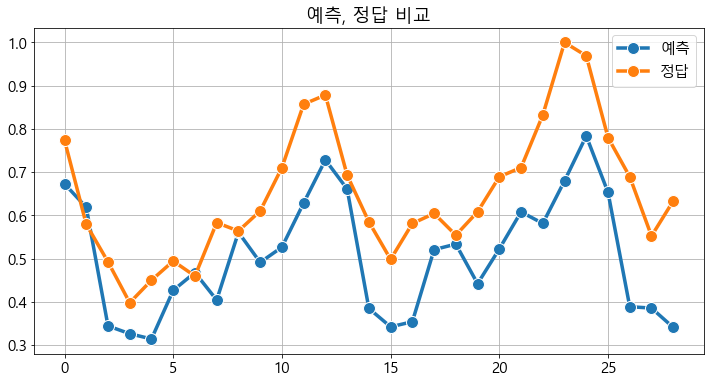

In [384]:
# RNN으로 예측
pred = model.predict(X_test)


# 그래프 그리기
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # window 한글 폰트 설정
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 글자가 꺠지는 현상 해결
plt.figure(figsize=(12,6))
plt.plot(pred,label='예측',marker='o',linewidth=3.5,markersize=12,
                markeredgecolor = 'w',markeredgewidth=1)
plt.plot(Y_test,label='정답',marker='o',linewidth=3.5,markersize=12,
                markeredgecolor = 'w',markeredgewidth=1)
plt.title('예측, 정답 비교')
plt.grid()
plt.legend()
plt.show()

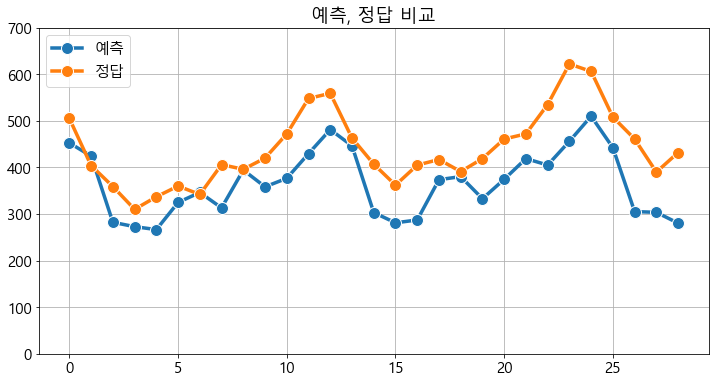

In [385]:
# 데이터 역전환
# 정규화 된 데이터를 원본으로 전환
# print('역전환 전:',pred.flatten())
pred = scaler.inverse_transform(pred)
# print('역전환 후:',pred.flatten())
# print(Y_test)
Y_test = scaler.inverse_transform(Y_test)
# print(Y_test)

# 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(pred,label='예측',marker='o',linewidth=3.5,markersize=12,
                markeredgecolor = 'w',markeredgewidth=1)
plt.plot(Y_test,label='정답',marker='o',linewidth=3.5,markersize=12,
                markeredgecolor = 'w',markeredgewidth=1)
plt.title('예측, 정답 비교')
plt.grid()
plt.ylim(0,700)
plt.legend(loc = 2)
plt.show()